In [1]:
import tensorflow as tf

In [2]:
data= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= data.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [6]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3914 - accuracy: 0.7677 - val_loss: 0.5130 - val_accuracy: 0.8630
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5696 - accuracy: 0.8478 - val_loss: 0.3875 - val_accuracy: 0.9113
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4705 - accuracy: 0.8776 - val_loss: 0.3305 - val_accuracy: 0.9234
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4326 - accuracy: 0.8892 - val_loss: 0.2760 - val_accuracy: 0.9253
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3896 - accuracy: 0.8992 - val_loss: 0.3274 - val_accuracy: 0.9307
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3654 - accuracy: 0.9064 - val_loss: 0.3114 - val_accuracy: 0.9342
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.9134 - val_loss: 0.3273 - val_accuracy:

In [7]:
print(model.evaluate(x_test,y_test))
pred=model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9432
[0.2721775770187378, 0.9431999921798706]
313/313 [==============================] - 0s 1ms/step


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score
confusion_matrix(y_test,pred)

array([[ 932,    0,    3,    1,    1,    2,    5,    1,   32,    3],
       [   0, 1101,    2,    5,    0,    0,    2,    1,   24,    0],
       [   1,    1,  952,   22,    3,    0,    3,   24,   25,    1],
       [   0,    0,    7,  970,    0,    4,    0,    6,   20,    3],
       [   0,    0,    4,    0,  898,    1,    7,    2,   18,   52],
       [   4,    0,    2,   26,    0,  811,   17,    2,   29,    1],
       [   4,    3,    1,    0,    2,    4,  932,    0,   12,    0],
       [   1,    5,   23,    9,    2,    1,    0,  967,    7,   13],
       [   3,    1,    3,    7,    6,    5,    6,    1,  937,    5],
       [   2,    3,    0,   18,    7,    3,    1,    8,   35,  932]],
      dtype=int64)

In [13]:
r2_score(y_test,pred)

0.8598840219895909

In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.95      0.92      0.94      1032
           3       0.92      0.96      0.94      1010
           4       0.98      0.91      0.94       982
           5       0.98      0.91      0.94       892
           6       0.96      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.82      0.96      0.89       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



Text(0.5, 1.0, 'True Label: 7 Predicted: 9')

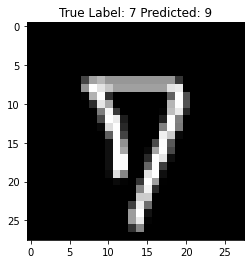

In [20]:
import numpy as np
import matplotlib.pyplot as plt
missclassified_eg=np.where(pred!=y_test)[0]
i=np.random.choice(missclassified_eg)
plt.imshow(x_test[i],cmap='gray')
plt.title("True Label: %s Predicted: %s" %(y_test[i],pred[i]))